Compute the BERT embedding vectors for the SU chatbot data and:
- Find their PCA components (n=2) and see if they form any clusters.
- Do K-Means clustering of the full embedding vectors
- Compare the results from [CLS] and pooler_output
- Instead of the final layer, use embeddings from intermediate layers
- Make random changes in the model parameters and see its effect

In [1]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#  Load CSV containing questions and answers
def load_csv(file_path):
    return pd.read_csv(file_path)

data = load_csv('SUchatbot.csv')
text = data['question'].tolist()

/usr/local/lib/python3.10/dist-packages/torch_xla/__init__.py:202: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


## 1. Compute BERT Embedding Vectors for SU Chatbot Data


In [2]:
# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Example input text (assuming SU chatbot data is a list of sentences)
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)

# Get BERT embeddings
with torch.no_grad():
    outputs = model(**inputs)
    last_hidden_states = outputs.last_hidden_state  # All token embeddings
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # [CLS] token embedding
    pooler_output = outputs.pooler_output  # Pooler output


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## 2. Find PCA Components (n=2)
Apply PCA to reduce the dimensionality of the embeddings to 2 components and visualize them to see if they form clusters.

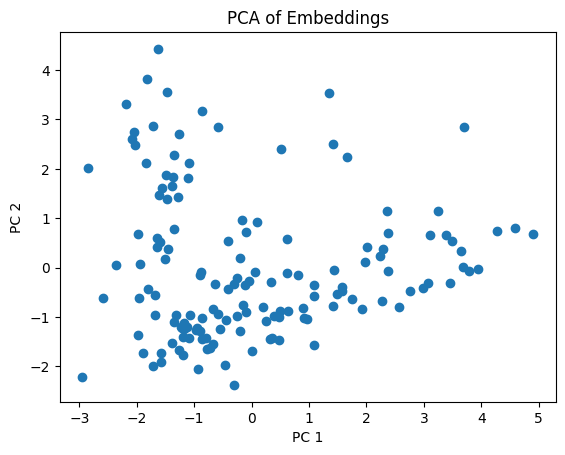

In [3]:
# Assuming you have all embeddings (either [CLS] or pooler_output)
embeddings = cls_embedding  # or use pooler_output

# Apply PCA
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

# Visualize the PCA components
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1])
plt.title('PCA of Embeddings')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


## 3. K-Means Clustering on Full Embedding Vectors
Use K-Means clustering on the full embeddings (both [CLS] and pooler_output).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


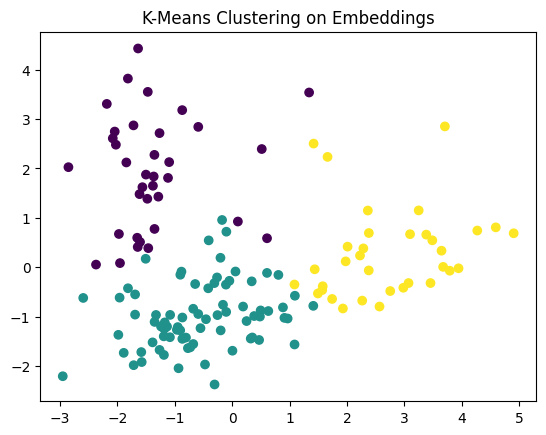

In [4]:
# Choose the number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(embeddings)

# Get the cluster labels
labels = kmeans.labels_

# Visualize the clusters (after applying PCA for 2D visualization)
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=labels)
plt.title('K-Means Clustering on Embeddings')
plt.show()


## 4. Use Embeddings from Intermediate Layers
Instead of using the final layer embeddings, extract embeddings from intermediate layers.


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


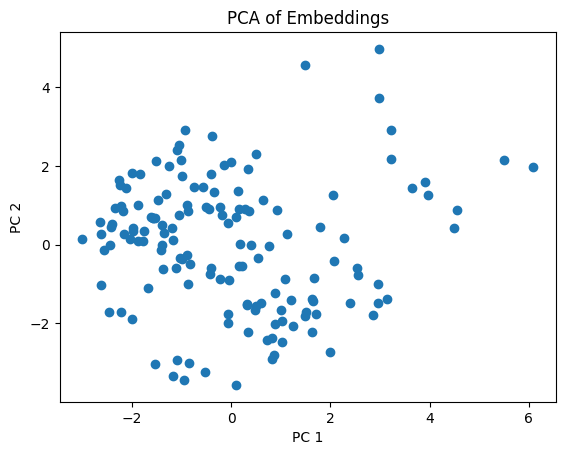

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


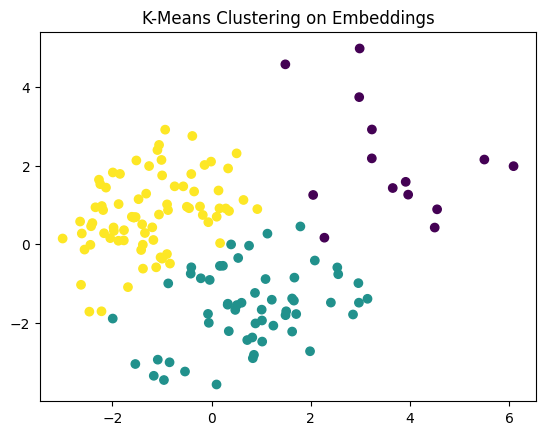

In [5]:

# Load tokenizer and model, and set output_hidden_states=True
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

# Example input text
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)

# Get BERT embeddings with hidden states
with torch.no_grad():
    outputs = model(**inputs)
    hidden_states = outputs.hidden_states  # Now you have access to intermediate layers

# Extract embeddings from a specific intermediate layer, say layer 6
intermediate_output = hidden_states[6]  # Get embeddings from layer 6
cls_intermediate_embedding = intermediate_output[:, 0, :]  # [CLS] embedding from layer 6


# Assuming you have all embeddings (either [CLS] or pooler_output)
embeddings = cls_intermediate_embedding  # or use pooler_output

# Apply PCA
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

# Visualize the PCA components
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1])
plt.title('PCA of Embeddings')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# Choose the number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(embeddings)

# Get the cluster labels
labels = kmeans.labels_

# Visualize the clusters (after applying PCA for 2D visualization)
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=labels)
plt.title('K-Means Clustering on Embeddings')
plt.show()


## 5. Random Changes in Model Parameters
Randomly perturb some model parameters and repeat the embedding, PCA, and clustering steps to observe how changes affect the results.

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


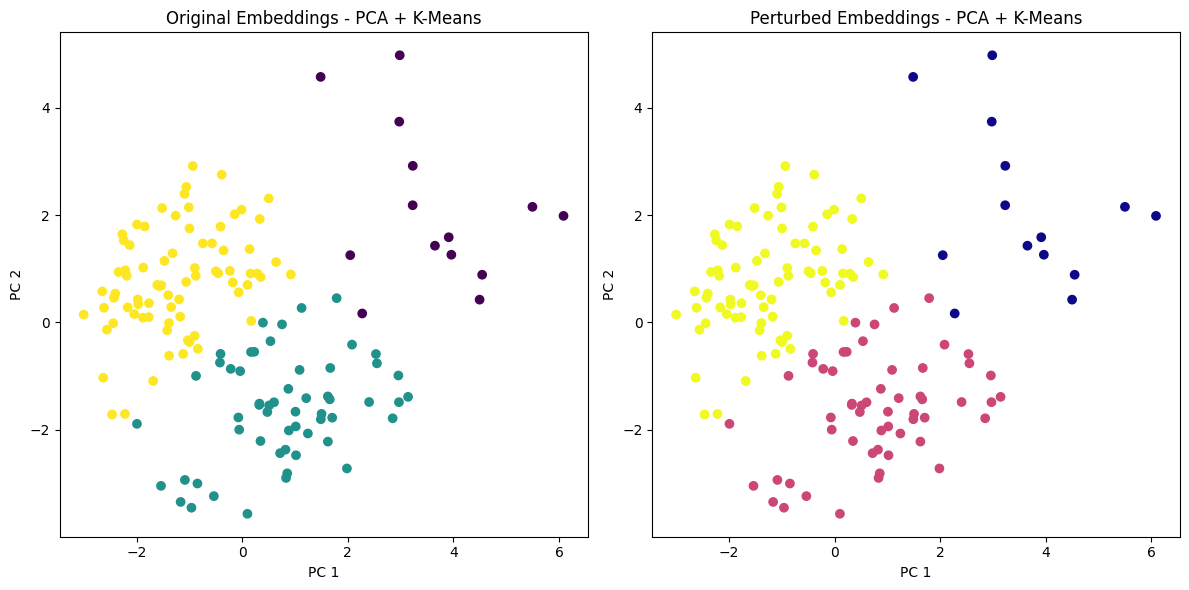

In [6]:
# Step 1: Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

# Step 2: Define input text (this should be your chatbot dataset as a list of sentences)
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)

# Step 3: Compute embeddings before modifying parameters
with torch.no_grad():
    original_outputs = model(**inputs)
    original_hidden_states = original_outputs.hidden_states
    original_cls_embedding = original_hidden_states[6][:, 0, :]  # Layer 6 [CLS] embedding

# Step 4: Modify model parameters randomly (e.g., in layer 6's attention weights)
with torch.no_grad():
    model.encoder.layer[6].attention.self.query.weight += torch.randn(model.encoder.layer[6].attention.self.query.weight.size()) * 0.01

# Step 5: Compute embeddings after parameter modification
with torch.no_grad():
    perturbed_outputs = model(**inputs)
    perturbed_hidden_states = perturbed_outputs.hidden_states
    perturbed_cls_embedding = perturbed_hidden_states[6][:, 0, :]  # Layer 6 [CLS] embedding

# Step 6: Apply PCA to both original and perturbed embeddings
pca = PCA(n_components=2)
original_pca_embeddings = pca.fit_transform(original_cls_embedding)
perturbed_pca_embeddings = pca.fit_transform(perturbed_cls_embedding)

# Step 7: K-Means clustering on both original and perturbed embeddings
kmeans = KMeans(n_clusters=3, random_state=42)
original_labels = kmeans.fit_predict(original_cls_embedding)
perturbed_labels = kmeans.fit_predict(perturbed_cls_embedding)

# Step 8: Visualize the PCA results and clustering (original vs perturbed)
plt.figure(figsize=(12, 6))

# Original PCA
plt.subplot(1, 2, 1)
plt.scatter(original_pca_embeddings[:, 0], original_pca_embeddings[:, 1], c=original_labels, cmap='viridis')
plt.title('Original Embeddings - PCA + K-Means')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Perturbed PCA
plt.subplot(1, 2, 2)
plt.scatter(perturbed_pca_embeddings[:, 0], perturbed_pca_embeddings[:, 1], c=perturbed_labels, cmap='plasma')
plt.title('Perturbed Embeddings - PCA + K-Means')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.tight_layout()
plt.show()
